In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import io, os, sys, types

In [3]:
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [4]:
def find_notebook(fullname='PA3_PreProcess_and_MakeFeatures', path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [5]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [6]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [7]:
sys.meta_path.append(NotebookFinder())

importing Jupyter notebook from PA3_PreProcess_and_MakeFeatures.ipynb
importing Jupyter notebook from PA3_ReadData_and_Explore.ipynb


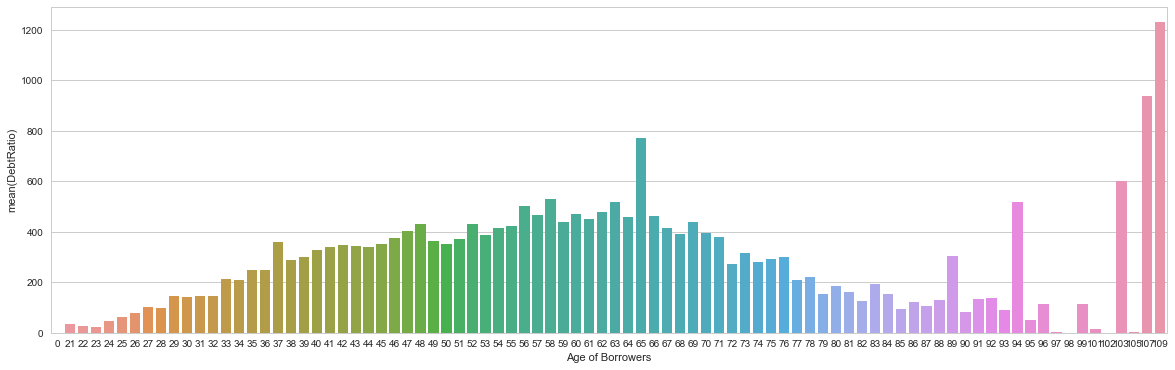

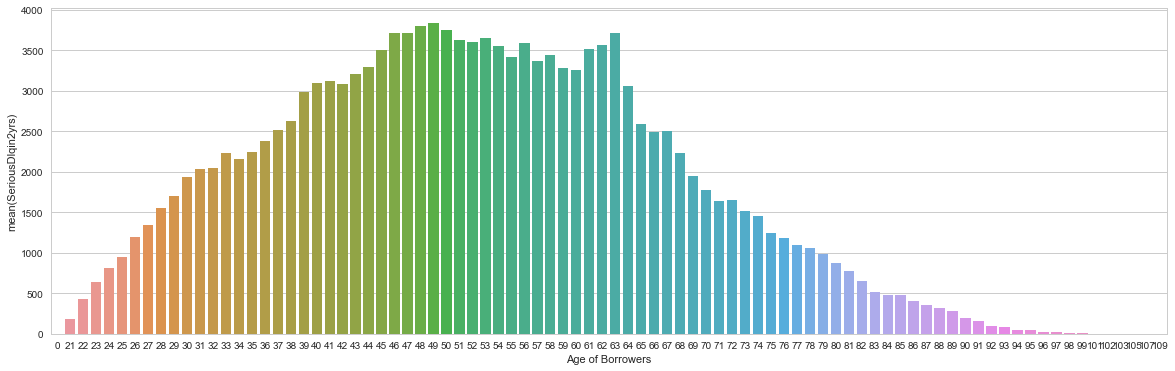

PA3_ReadData_and_Explore.ipynb:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "cell_type": "code",


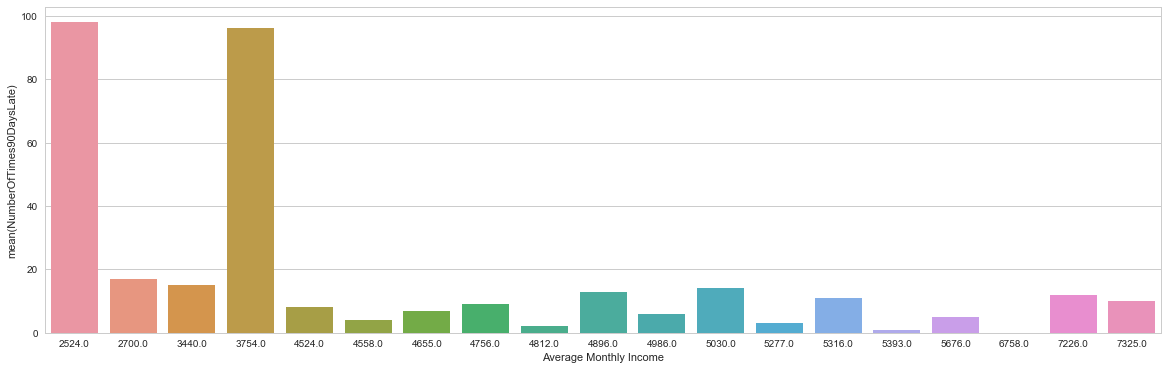

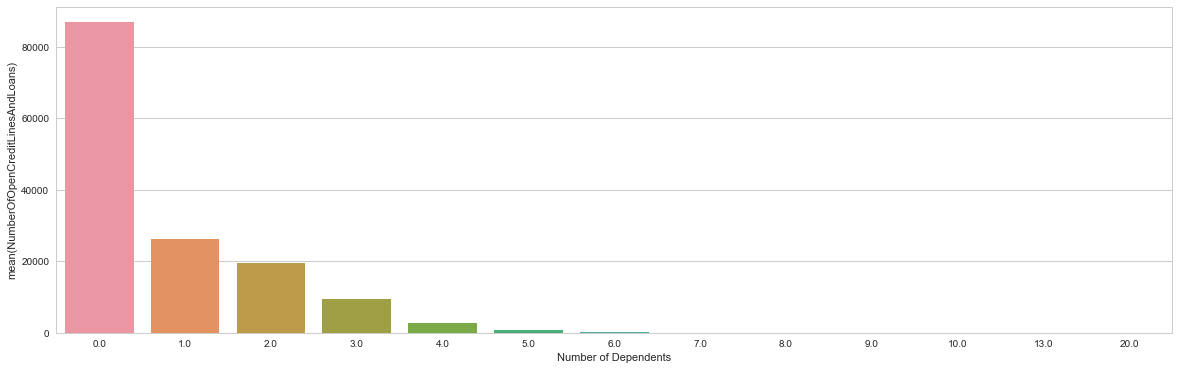

PA3_ReadData_and_Explore.ipynb:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "metadata": {


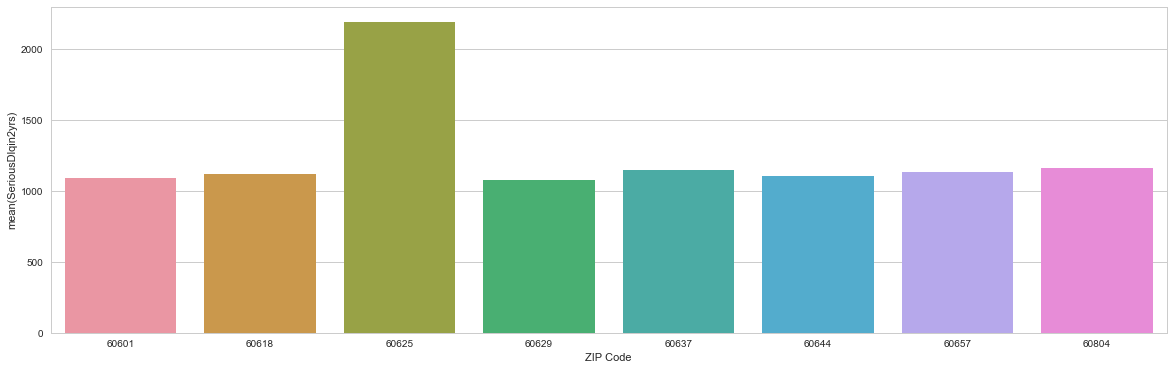

PA3_PreProcess_and_MakeFeatures.ipynb:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  "collapsed": true
PA3_PreProcess_and_MakeFeatures.ipynb:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  "execution_count": 1,


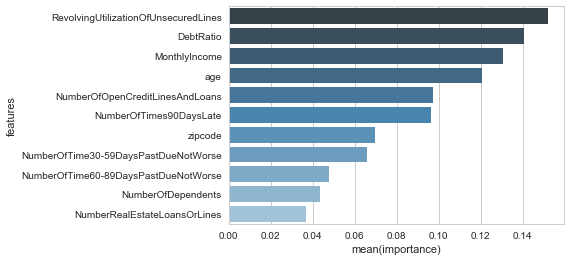

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

In [8]:
import PA3_PreProcess_and_MakeFeatures

# Building various classifiers

we first split the data into the training set and the testing set

In [9]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
df_important_features = PA3_PreProcess_and_MakeFeatures.df_important_features
df = PA3_PreProcess_and_MakeFeatures.df

In [11]:
#user-defined test_size_ratio
# will be good to do cross-validation but given the processing time for this assignment, I thought it will be wise to not touch this parameter
def train_test_split_ratio(important_features, outcome_variable, test_size_ratio):
    return train_test_split(important_features, outcome_variable, test_size=test_size_ratio, random_state=42)

In [12]:
delinquincy_train, delinquincy_test, outcomes_train, outcomes_test = train_test_split_ratio(df_important_features, df.SeriousDlqin2yrs, 0.3)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [22]:
Decision_Tree = DecisionTreeClassifier()
Logistic_Regression = LogisticRegression()
Support_Vector_Machine = svm.LinearSVC()
K_NearestNeighbors = KNeighborsClassifier()
Random_Forest_Classifier = RandomForestClassifier()
Gradient_Boosting_Classifier = GradientBoostingClassifier()
Bagging_Classifier = BaggingClassifier()

In [23]:
classifiers = [Decision_Tree]#, Logistic_Regression, Support_Vector_Machine, K_NearestNeighbors, Random_Forest_Classifier, Gradient_Boosting_Classifier, Bagging_Classifier]

In [24]:
#classifiers = [Decision_Tree, Logistic_Regression, Support_Vector_Machine, K_NearestNeighbors, Random_Forest_Classifier, Gradient_Boosting_Classifier, Bagging_Classifier]

In [63]:
classifiers_names = ['Decision_Tree', 'Logistic_Regression', 'Support_Vector_Machine', 'K_NearestNeighbors', 'Random_Forest_Classifier', 'Gradient_Boosting_Classifier', 'Bagging_Classifier']

In [26]:
def classifier_fit(classifier, X_train, Y_train, X_output, Y_output):
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_output, Y_output)
    return score

In [27]:
def model_classifiers(classifiers_names, X_train, Y_train, X_output, Y_output):
    score_classifiers_list = []
    for classifier in classifiers_names:
        score = classifier_fit(classifier, X_train, Y_train, X_output, Y_output)
        score_classifiers_list.append((classifier, score))
    return score_classifiers_list

In [28]:
score_classifiers_list = model_classifiers(classifiers, delinquincy_train, outcomes_train, delinquincy_test, outcomes_test)

In [133]:
score_classifiers_list

[(DecisionTreeClassifier(class_weight='balanced', criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
  0.89742222222222223),
 (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False), 0.9349777777777778),
 (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.93513333333333337),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

Printing out the classifiers and scores for their default parameters in a dataframe format

In [190]:
def default_estimators_score(score_classifiers_list_1):
    accuracy_score = []

    for classifier in score_classifiers_list_1:
        accuracy_score.append(classifier[1])
                
    results_df = pd.DataFrame({'classifiers': classifiers_names, 'default_accuracy_score': accuracy_score})
    return results_df

In [191]:
estimators_default_score_df = default_estimators_score(score_classifiers_list)

In [69]:
estimators_default_score_df.sort_values(by='default_accuracy_score')

NameError: name 'estimators_default_score_df' is not defined

In [ ]:
#interpretation

# tweaking the parameters to see changes in the output

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    Decision_Tree: {'max_features': ['auto', 'sqrt', 'log2'], 'class_weight':['balanced', None]}, 
    K_NearestNeighbors: {'n_neighbors': list(range(11)), 'p':[1,2]},
    Logistic_Regression: {'penalty': ['l1', 'l2'], 'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    Support_Vector_Machine: {'penalty': ['l1', 'l2'], 'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    Random_Forest_Classifier : {'max_features':['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
    Gradient_Boosting_Classifier: {'loss': ['deviance', 'exponential'], 'criterion': ['friedman_mse', 'mse', 'mae']},
    Bagging_Classifier : {'n_estimators': list(range(11)), 'bootstrap_features': ['True', 'False']}
                }

In [40]:
def parameter_tuning(classifiers_1):
    
    d_best_estimators = {}
    
    for classifier in classifiers_1:
        
        grid = GridSearchCV(estimator=classifier, param_grid=param_grid_dt[classifier])
        grid.fit(delinquincy_train, outcomes_train)
        
        best_params = grid.best_params_
        d_best_estimators[classifier] = best_params
        accuracy_best_score = grid.best_score_
        d_best_estimators[classifier]['best_accuracy_score'] = accuracy_best_score
            
    return d_best_estimators

In [41]:
best_estimators = parameter_tuning(classifiers)

In [42]:
best_estimators

{DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'): {'best_accuracy_score': 0.89828571428571424,
  'class_weight': 'balanced',
  'max_features': 'auto'}}

Printing out the classifiers, the names of their best dual features, and scores for their default parameters in a dataframe format

In [65]:
def best_estimators_lists(best_estimators_1):
    classifier_list = []
    best_accuracy_score = []
    feature_one_name = []
    feature_one_value = []
    feature_two_name = []
    feature_two_value = []

    for classifier in best_estimators_1:
        classifier_list.append(classifier)
        
        counter = 0
        for feature in best_estimators_1[classifier]:
            if feature == 'best_accuracy_score':
                best_accuracy_score.append(best_estimators_1[classifier][feature])
                
            elif feature != 'best_accuracy_score' and counter == 0:
                feature_one_name.append(feature)
                feature_one_value.append(best_estimators_1[classifier][feature])
                counter += 1
                
            elif feature != 'best_accuracy_score' and counter == 1:
                feature_two_name.append(feature)
                feature_two_value.append(best_estimators_1[classifier][feature])
                counter += 1
                
    results_df = pd.DataFrame({'classifiers':classifier_list, 'feature_one_name':feature_one_name, 'feature_one_value':feature_one_value, 'feature_two_name':feature_two_name, 'feature_two_value':feature_two_value})
    results_df['accuracy_score'] = best_accuracy_score
    return results_df

In [66]:
best_estimators_scores = best_estimators_lists(best_estimators)

In [67]:
best_estimators_scores

,classifiers,feature_one_name,feature_one_value,feature_two_name,feature_two_value,accuracy_score
0,"DecisionTreeClassifier(class_weight=None, crit...",class_weight,balanced,max_features,auto,0.898286


In [ ]:
#interpretation

# setting all the classifiers to their best estimated features/values

In [72]:
for classifier in best_estimators:
    for param in classifier.get_params():
        if param in best_estimators[classifier]:
            setattr (classifier, param, best_estimators[classifier][param])

In [ ]:
classifiers

# evaluating the fit of the model

In [29]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [35]:
# evaluating on the classifiers with their best parameters i.e. parameters that give the highest accuracy score

def classifiers_evaluation(X_test, Y_test):
    class_zero_precision = []
    class_zero_recall = []
    class_zero_fscore = []
    class_one_precision = []
    class_one_recall = []
    class_one_fscore = []
    
    for classifier in classifiers:
        predicted = classifier.predict(X_test)
        precision, recall, thresholds = precision_recall_curve(Y_test, predicted)
        precision_result, recall_result, fscore_result, support_result = precision_recall_fscore_support(Y_test, predicted)
        #print(classification_report(Y_test, predicted))
        
        for i in range(len(precision_result)):
            if i == 0:  
                class_zero_precision.append(precision_result[i])
                class_zero_recall.append(recall_result[i])
                class_zero_fscore.append(fscore_result[i])
                
            elif i == 1:
                class_one_precision.append(precision_result[i])
                class_one_recall.append(recall_result[i])
                class_one_fscore.append(fscore_result[i])
        
        plt.title('Precision Recall Curve')
        plt.plot(precision, recall)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('Recall')
        plt.xlabel('Precision')
        plt.show()

    return classifiers_evaluation_list, class_zero_precision, class_zero_recall, class_zero_fscore, class_one_precision, class_one_recall, class_one_fscore

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


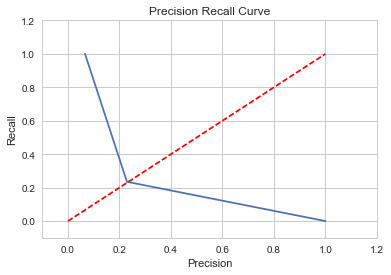

In [36]:
classifiers_evaluation_list_names, class_zero_precision, class_zero_recall, class_zero_fscore, class_one_precision, class_one_recall, class_one_fscore = classifiers_evaluation(delinquincy_test, outcomes_test)

In [54]:
results_df_class_zero = pd.DataFrame({'Class': [0]*len(classifiers_evaluation_list_names), 'classifiers':classifiers, 'precision':class_zero_precision, 'recall':class_zero_recall, 'fscore':class_zero_fscore})

In [55]:
results_df_class_one = pd.DataFrame({'Class': [1]*len(classifiers_evaluation_list_names), 'classifiers':classifiers, 'precision':class_one_precision, 'recall':class_one_recall, 'fscore':class_one_fscore})

In [56]:
results_df_class_zero

,Class,classifiers,fscore,precision,recall
0,0,"DecisionTreeClassifier(class_weight=None, crit...",0.944786,0.945642,0.943931


In [57]:
results_df_class_one

,Class,classifiers,fscore,precision,recall
0,1,"DecisionTreeClassifier(class_weight=None, crit...",0.231942,0.229058,0.234899


In [58]:
results = results_df_class_zero.append(results_df_class_one)

In [49]:
results

,Class,classifiers,fscore,precision,recall
0,0,"DecisionTreeClassifier(class_weight=None, crit...",0.944786,0.945642,0.943931
0,1,"DecisionTreeClassifier(class_weight=None, crit...",0.231942,0.229058,0.234899


In [ ]:
#interpretation

In [64]:
from sklearn.metrics import roc_curve, auc
from ggplot import *

def calculate_roc_and_auc_2(X_test, y_test):
    
    roc_auc_score = []
    i = 0

    for classifier in classifiers:
        
        probs = classifier.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_test, preds)
        roc_auc = auc(fpr, tpr)
        roc_auc_score.append(roc_auc)

        # method I: plt
        plt.title(classifiers_names[i] + ' ' + 'Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        i += 1

        # method II: ggplot
        
        df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
        ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
    
    return roc_auc_score

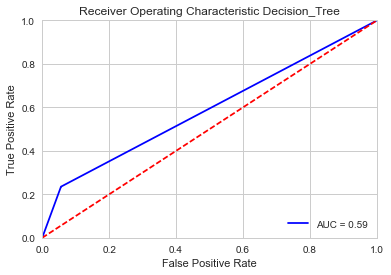

In [65]:
roc_auc_score = calculate_roc_and_auc_2(delinquincy_test, outcomes_test)

In [67]:
df_roc_auc_score = pd.DataFrame({'classifiers':classifiers, 'roc_auc_score':roc_auc_score})

In [68]:
df_roc_auc_score

,classifiers,roc_auc_score
0,"DecisionTreeClassifier(class_weight=None, crit...",0.589513


In [ ]:
#interpretation

In [ ]:
# things to do
# produce the confusion matrices for each classifier